# LAB 0 - Introduction to Data Exploration and realizing the potential of using Machine Learning
The objective of this lab is to understand the fundamentals of building neural networks with Tensorflow/Keras as well as Pytorch.

#### Project Info

 ->Copyright 2024 Luis R Soenksen

 ->Last Update: March 24, 2024

```
**Licensed under the Apache License, Version 2.0**
You may not use this file except in compliance with the License. You may obtain a copy of the License at
https://www.apache.org/licenses/LICENSE-2.0
Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.
```

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Compatible with Google Colab</a>      
    </td>
  <td>
    <a target="_blank" href="https://github.com/lrsoenksen/"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Visit my GitHub</a>
  </td>
  <td>
    <a href="https://www.tensorflow.org"><img src="https://storage.googleapis.com/cloud-samples-data/ai-platform/census/keras-tensorflow-cmle.png" width="150px"/>Built with Tensorflow / Keras / GC</a>
  </td>
  <td>
    <a href="https://pytorch.org"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/PyTorch_logo_black.svg/488px-PyTorch_logo_black.svg.png" width="150px"/>Built with Pytorch </a>
  </td>
</table>

------------------------------------------------------

#### Build various baseline machine learning models to compare
Here we use "Lazy Predict" to get a sense of the convencience of using machine learning, which is a package designed to make life easier for data scientists and machine learning enthusiasts. It automates the tedious task of model fitting and comparison, allowing you to quickly assess a wide range of models with minimal code. Lazy Predict helps build a lot of basic models without much code and helps understand which models works better without any parameter tuning across classification and regression problems.

*   For **classification** Lazypredict includes:

      LinearSVC, SGDClassifier, MLPClassifier, Perceptron, LogisticRegression, LogisticRegressionCV, SVC, CalibratedClassifierCV, PassiveAggressiveClassifier, LabelPropagation, LabelSpreading, RandomForestClassifier, etc. See Documentation here https://lazypredict.readthedocs.io.

*   For **regression** Lazypredict includes:

      SVR, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, NuSVR, GradientBoostingRegressor, KNeighborsRegressor, SGDRegressor, etc. See Documentation here https://lazypredict.readthedocs.io.

### **Step 0) Setup system and import required packages**

In [5]:
## You will need to install lazypredict first time you try to use the package in a new instance
!pip3 install lazypredict
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\bkrou\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\bkrou\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split # data split

import lazypredict
from lazypredict.Supervised import LazyClassifier #CLassification
from lazypredict.Supervised import LazyRegressor #Regression

### **EXAMPLE A) Regression Models**

#### **Step 1) Load Data**

This first example uses the NCSU Diabetes dataset (https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html) accessible through sklearn for prediction of expected diabetes severity.

The ten feature variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients at a baseline timepoint, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

Motivation:

*   In 2021, the International Diabetes Federation (IDF) approximated that there were 537 million individuals living with diabetes, making up 10.5% of the global population, resulting in global healthcare expenses amounting to \$966 billion. This health cost is predicted to rise to more than $1054 billion by 2045. Thus, automated systems to diagnose such disease could be important for global health.

Inputs:

*   Age (in years)

*   Sex (self reported)

*   Bmi (body mass index)

*   Bp (average blood pressure)

*   s1 Tc, (total serum cholesterol)

*   s2 Ldl, (low-density lipoproteins)

*   s3 Hdl, (high-density lipoproteins)

*   s4 Tch, (total cholesterol / HDL)

*   s5 Ltg, (possibly log of serum triglycerides level)

*   s6 Glu, (blood sugar level)

Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of n_samples (i.e. the sum of squares of each column totals 1).

Outputs:
*   Quantitative measure of disease progression one year after baseline (real value)

References:

1.   Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) “Least Angle Regression,” Annals of Statistics (with discussion), 407-499. (URL: https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)

In [7]:
# Load a relevant dataset,
regression_data = datasets.load_diabetes()
df_regression_data = pd.DataFrame(np.c_[regression_data['data'], regression_data['target']], columns = np.append(['age','sex','bmi','bp','tc','ldl','hdl','tch', 'ltg', 'glu'], ['target']))
df_regression_data

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,target
0,0.04,0.05,0.06,0.02,-0.04,-0.03,-0.04,-0.00,0.02,-0.02,151.00
1,-0.00,-0.04,-0.05,-0.03,-0.01,-0.02,0.07,-0.04,-0.07,-0.09,75.00
2,0.09,0.05,0.04,-0.01,-0.05,-0.03,-0.03,-0.00,0.00,-0.03,141.00
3,-0.09,-0.04,-0.01,-0.04,0.01,0.02,-0.04,0.03,0.02,-0.01,206.00
4,0.01,-0.04,-0.04,0.02,0.00,0.02,0.01,-0.00,-0.03,-0.05,135.00
...,...,...,...,...,...,...,...,...,...,...,...
437,0.04,0.05,0.02,0.06,-0.01,-0.00,-0.03,-0.00,0.03,0.01,178.00
438,-0.01,0.05,-0.02,-0.07,0.05,0.08,-0.03,0.03,-0.02,0.04,104.00
439,0.04,0.05,-0.02,0.02,-0.04,-0.01,-0.02,-0.01,-0.05,0.02,132.00
440,-0.05,-0.04,0.04,0.00,0.02,0.02,-0.03,0.03,0.04,-0.03,220.00


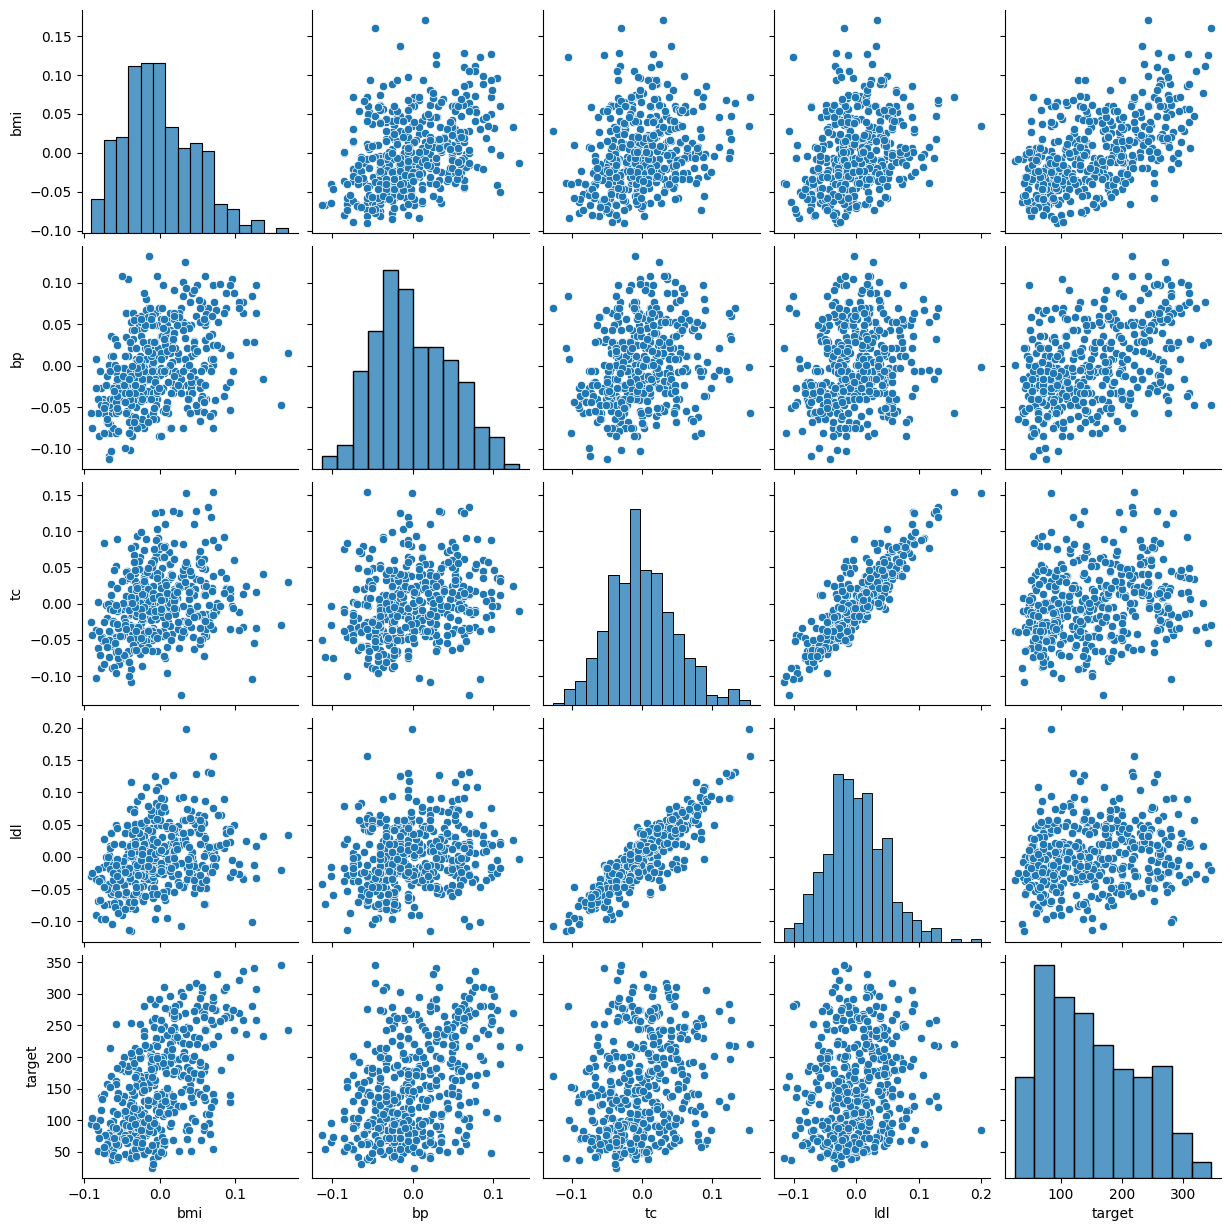

In [8]:
# Plot the first 5 variables (features) and relation within each other to explore the dataset and see some linear and non-linear relations in the data
sns.pairplot(df_regression_data[['bmi','bp','tc','ldl','target']])

In [9]:
print("Counts per class")
#showing dataframe info
df_regression_data.count()

Counts per class


age       442
sex       442
bmi       442
bp        442
tc        442
ldl       442
hdl       442
tch       442
ltg       442
glu       442
target    442
dtype: int64

<Axes: >

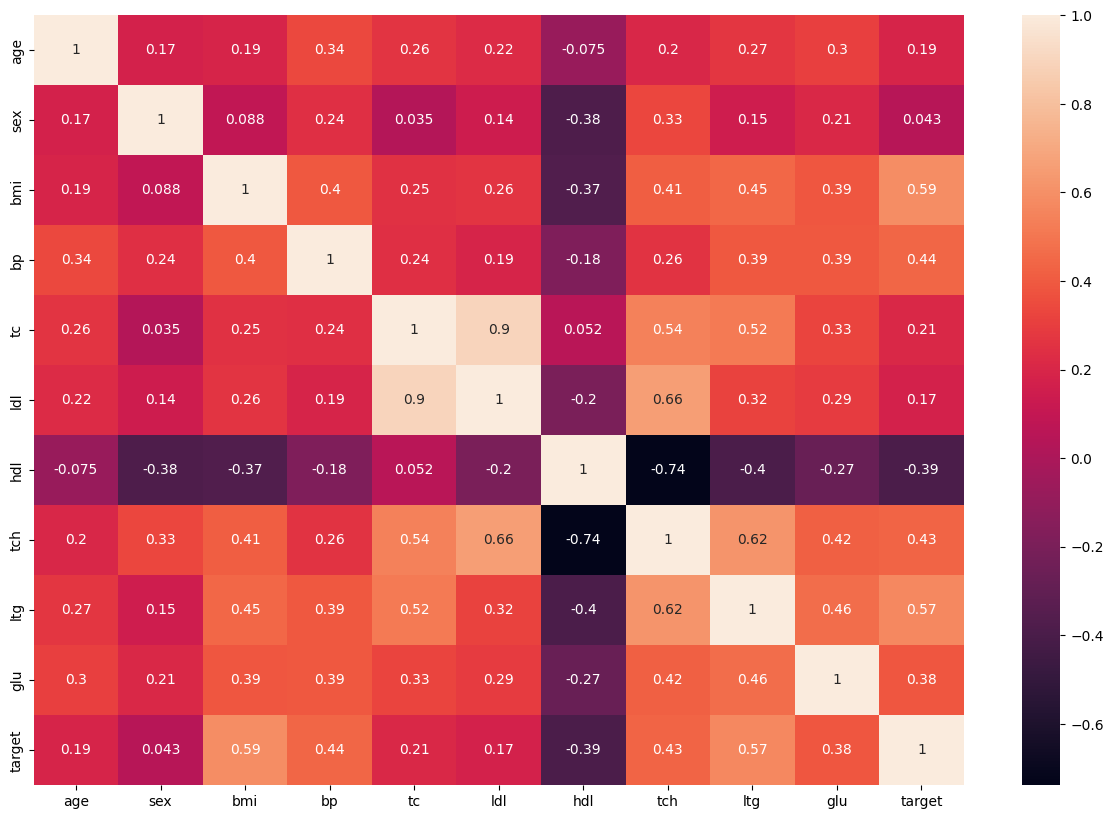

In [10]:
# Plot class distribution
plt.figure(figsize=(15,10))
sns.heatmap(df_regression_data.corr(), annot=True)

#### **Step 2) Define, Train and Evaluate Models**

In [11]:
# Load the dataset, split into input (X) and output (y) variables

X = regression_data.data
y = regression_data.target

# Split dataset in to train and test using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize LazyRegressor and fit
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Models is a pandas DataFrame of model performance metrics
models

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 584
[LightGBM] [Info] Number of data points in the train set: 353, number of used features: 10
[LightGBM] [Info] Start training from score 153.376771
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
TransformedTargetRegressor,0.37,0.44,54.70,0.01
LinearRegression,0.37,0.44,54.70,0.01
Ridge,0.36,0.44,54.81,0.01
Lars,0.36,0.43,54.89,0.01
LarsCV,0.36,0.43,54.98,0.02
ElasticNetCV,0.36,0.43,54.99,0.09
LassoLarsIC,0.36,0.43,55.00,0.01
LassoLars,0.36,0.43,55.00,0.01
Lasso,0.36,0.43,55.00,0.01


In [12]:
# Print list of regressors available in lazypredict (https://lazypredict.readthedocs.io/en/latest/usage.html)
lazypredict.Supervised.REGRESSORS

[('AdaBoostRegressor', sklearn.ensemble._weight_boosting.AdaBoostRegressor),
 ('BaggingRegressor', sklearn.ensemble._bagging.BaggingRegressor),
 ('BayesianRidge', sklearn.linear_model._bayes.BayesianRidge),
 ('DecisionTreeRegressor', sklearn.tree._classes.DecisionTreeRegressor),
 ('DummyRegressor', sklearn.dummy.DummyRegressor),
 ('ElasticNet', sklearn.linear_model._coordinate_descent.ElasticNet),
 ('ElasticNetCV', sklearn.linear_model._coordinate_descent.ElasticNetCV),
 ('ExtraTreeRegressor', sklearn.tree._classes.ExtraTreeRegressor),
 ('ExtraTreesRegressor', sklearn.ensemble._forest.ExtraTreesRegressor),
 ('GammaRegressor', sklearn.linear_model._glm.glm.GammaRegressor),
 ('GaussianProcessRegressor',
  sklearn.gaussian_process._gpr.GaussianProcessRegressor),
 ('GradientBoostingRegressor', sklearn.ensemble._gb.GradientBoostingRegressor),
 ('HistGradientBoostingRegressor',
  sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingRegressor),
 ('HuberRegressor', sk

### **EXAMPLE B) Classification Models**

#### **Step 1) Load Data**

This second example uses the UCI ML Breast Cancer Wisconsin (Diagnostic) dataset (https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) accesible through sklearn.

The Features in the dataset were computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the analyzed pathology image (not provided).

Motivation:

*   Breast cancer caused 670 000 deaths globally in 2022. Roughly half of all breast cancers occur in women with no specific risk factors other than sex and age. Breast cancer was the most common cancer in women in 157 countries out of 185 in 2022. Thus, automated systems to diagnose such disease could be important for global health.

Inputs:
*   Radius (mean of distances from center to points on the perimeter)
*   Texture (standard deviation of gray-scale values)
*   Perimeter
*   Area
*   Smoothness (local variation in radius lengths)
*   Compactness (perimeter^2 / area - 1.0)
*   Concavity (severity of concave portions of the contour)
*   Concave points (number of concave portions of the contour)
*   Symmetry
*   Fractal dimension ("coastline approximation" - 1)

All are real-values computed from cell nucleus pathology. The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each analysis, resulting in 30 features. All feature values were recoded with four significant digits.

Outputs:
*   Diagnosis (M/0 = malignant, B/1 = benign). Class distribution: 212 malignant and 357 benign

References:

1.   Wolberg,William, Mangasarian,Olvi, Street,Nick, and Street,W.. (1995). Breast Cancer Wisconsin (Diagnostic). UCI Machine Learning Repository. (URL: https://doi.org/10.24432/C5DW2B )

In [13]:
# Load a relevant dataset,
classification_data = datasets.load_breast_cancer()
df_classification_data = pd.DataFrame(np.c_[classification_data['data'], classification_data['target']], columns = np.append(classification_data['feature_names'], ['target']))
df_classification_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,0.08,...,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,0.00
1,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,0.06,...,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,0.00
2,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,0.06,...,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,0.00
3,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,...,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,0.00
4,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,0.06,...,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.00,0.11,0.12,0.24,0.14,0.17,0.06,...,26.40,166.10,2027.00,0.14,0.21,0.41,0.22,0.21,0.07,0.00
565,20.13,28.25,131.20,1261.00,0.10,0.10,0.14,0.10,0.18,0.06,...,38.25,155.00,1731.00,0.12,0.19,0.32,0.16,0.26,0.07,0.00
566,16.60,28.08,108.30,858.10,0.08,0.10,0.09,0.05,0.16,0.06,...,34.12,126.70,1124.00,0.11,0.31,0.34,0.14,0.22,0.08,0.00
567,20.60,29.33,140.10,1265.00,0.12,0.28,0.35,0.15,0.24,0.07,...,39.42,184.60,1821.00,0.17,0.87,0.94,0.27,0.41,0.12,0.00


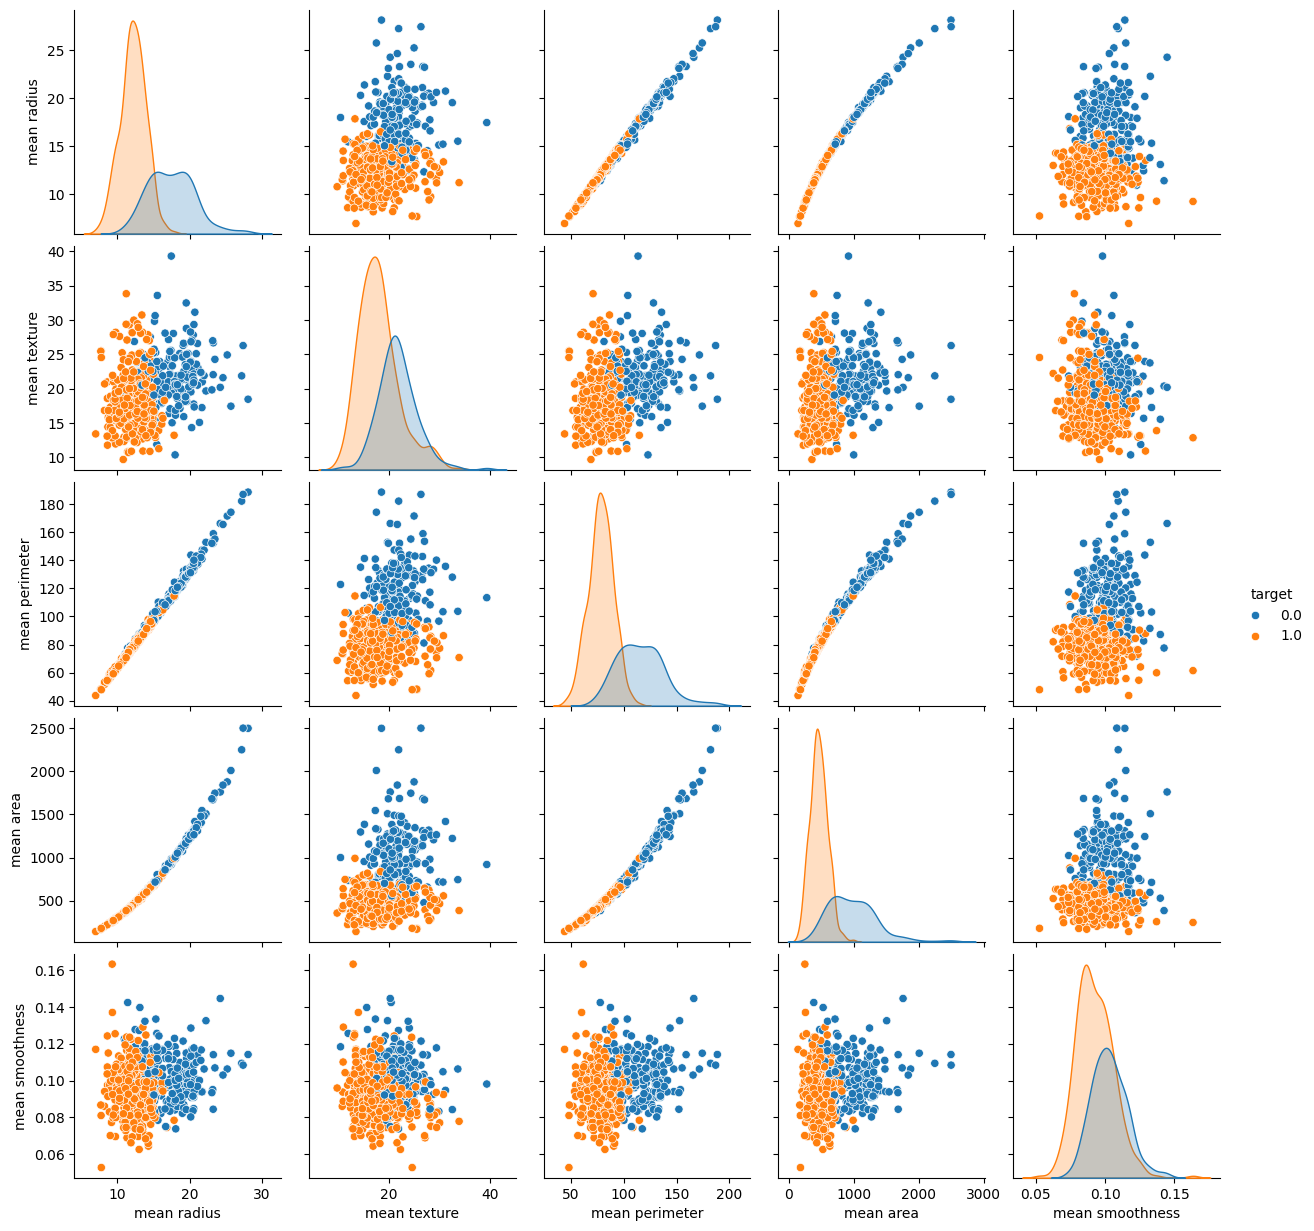

In [14]:
# Plot the first 5 variables (features) and relation within each other to explore the dataset and see some linear and non-linear relations in the data
# Remember 0 = malignant, 1 = benign
sns.pairplot(df_classification_data, hue = 'target', vars = ['mean radius', 'mean texture', 'mean perimeter','mean area','mean smoothness'])

In [15]:
print("Counts per class")
df_classification_data['target'].value_counts()

Counts per class


target
1.00    357
0.00    212
Name: count, dtype: int64

<Axes: >

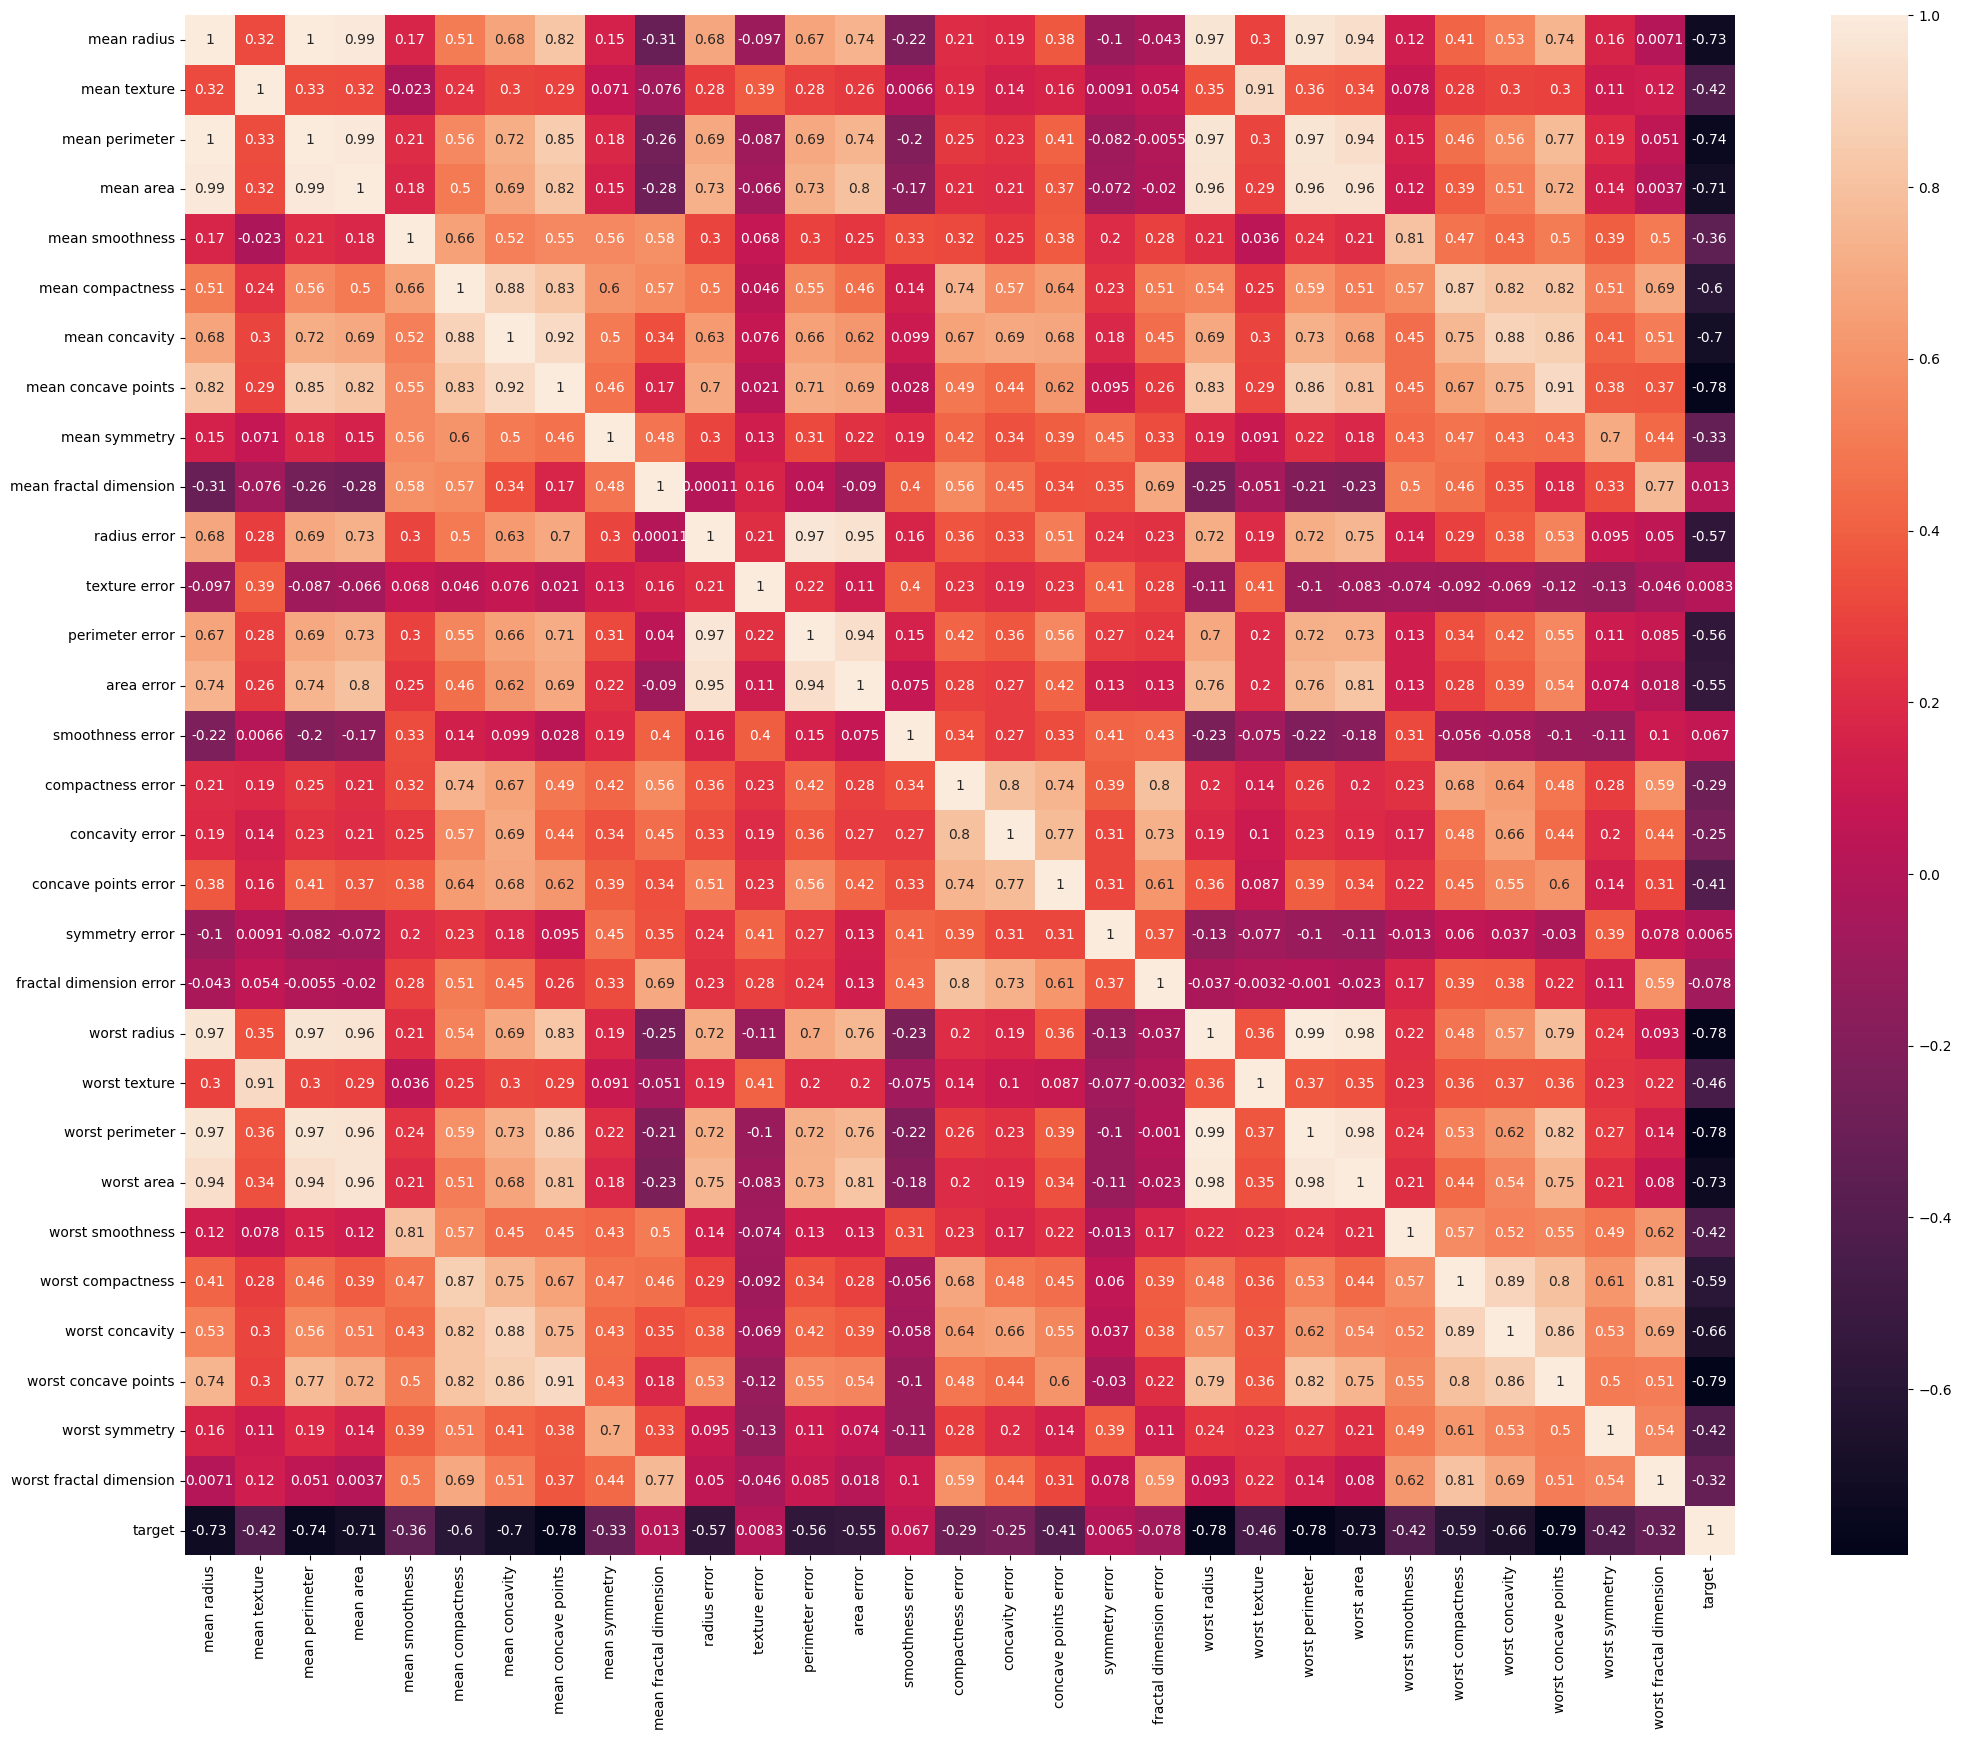

In [16]:
# Plot class distribution
plt.figure(figsize=(25,20))
sns.heatmap(df_classification_data.corr(), annot=True)

#### **Step 2) Define, Train and Evaluate Models**

In [17]:
# Print list of classifiers available in lazypredict (https://lazypredict.readthedocs.io/en/latest/usage.html)
lazypredict.Supervised.CLASSIFIERS

[('AdaBoostClassifier', sklearn.ensemble._weight_boosting.AdaBoostClassifier),
 ('BaggingClassifier', sklearn.ensemble._bagging.BaggingClassifier),
 ('BernoulliNB', sklearn.naive_bayes.BernoulliNB),
 ('CalibratedClassifierCV', sklearn.calibration.CalibratedClassifierCV),
 ('CategoricalNB', sklearn.naive_bayes.CategoricalNB),
 ('DecisionTreeClassifier', sklearn.tree._classes.DecisionTreeClassifier),
 ('DummyClassifier', sklearn.dummy.DummyClassifier),
 ('ExtraTreeClassifier', sklearn.tree._classes.ExtraTreeClassifier),
 ('ExtraTreesClassifier', sklearn.ensemble._forest.ExtraTreesClassifier),
 ('FixedThresholdClassifier',
  sklearn.model_selection._classification_threshold.FixedThresholdClassifier),
 ('GaussianNB', sklearn.naive_bayes.GaussianNB),
 ('KNeighborsClassifier',
  sklearn.neighbors._classification.KNeighborsClassifier),
 ('LabelPropagation',
  sklearn.semi_supervised._label_propagation.LabelPropagation),
 ('LabelSpreading', sklearn.semi_supervised._label_propagation.LabelSprea

In [18]:
'''
Fill the in the missing code marked as # TO-DO
'''
# Load the dataset, split into input (X) and output (y) variables
X = classification_data.data
y = classification_data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LazyClassifier and fit
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions =  clf.fit(X_train, X_test, y_train, y_test)

# Display Models is a pandas DataFrame of model performance metrics
models

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4540
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.98,0.98,0.98,0.98,0.03
PassiveAggressiveClassifier,0.98,0.98,0.98,0.98,0.01
SVC,0.98,0.98,0.98,0.98,0.01
Perceptron,0.97,0.97,0.97,0.97,0.01
LogisticRegression,0.97,0.97,0.97,0.97,0.02
ExtraTreeClassifier,0.96,0.97,0.97,0.97,0.01
SGDClassifier,0.96,0.97,0.97,0.97,0.01
CalibratedClassifierCV,0.97,0.97,0.97,0.97,0.05
GaussianNB,0.96,0.96,0.96,0.96,0.02


------------------------------------------------------

### **EXTRA EXAMPLE) Initial exploration into baseline Neural Networks (in anticipation to future lectures)**

We will use the previous classification data

#### Extra A) Build basic Multilayer Perceptron with Tensorflow/Keras
In Keras, the neural network framework  uses TensorFlow as the backend. Since keras is embedded in the TF Repository,  the syntax of declaring layers in TensorFlow is similar to the syntax of Keras. First, we declare the variable and assign it to the type of architecture we will be declaring, in this case a “Sequential()” architecture. Next, we directly add layers in a sequential manner using the model.add() method. The type of layer can be imported from tf.layers as shown in the code snippet below..

In [20]:
'''
Fill the in the missing code marked as # TO DO
'''

#Import Tensorflow/Keras libraries
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset, split into input (X) and output (y) variables
X = classification_data.data.astype(np.float32)# TO DO
y = classification_data.target.astype(np.float32).reshape(-1, 1)# TO DO

# Define model
model= Sequential()
model.add(Dense(32, activation='relu', input_dim = np.shape(X)[1]))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
print(model)

# Train model using model.fit()
n_epochs = 10
batch_size = 32
# TO DO
model.fit(X, y, epochs=n_epochs, batch_size=batch_size, verbose=1)

# Run Inferences and display using model.predict()
y_pred =  model.predict(X)

# compute accuracy
accuracy = (y_pred.round() == y).mean() #TO DO
print(f"Accuracy {accuracy}")

# make class predictions with the model
predictions = (y_pred > 0.5)
for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

<Sequential name=sequential_1, built=True>
Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6274 - loss: 90.9482 
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4974 - loss: 14.1372 
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5536 - loss: 5.1221  
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6467 - loss: 1.8287 
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7469 - loss: 1.4201 
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7575 - loss: 1.3103 
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8032 - loss: 1.0684 
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8330 - loss: 0.9174 
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8524 - loss: 0.8050 
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8401 - loss: 0.7414 
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy 0.8506151142355008
[17.989999771118164, 10.38000011444

------------------------------------------------------

#### Extra B) Build same basic Multilayer Perceptron with Pytorch
In PyTorch, our neural network will be a NeuralNet "class" where the torch.nn package is used to import the  layers that are needed for our specified architecture. All the layers are  declared in the __init__() method, and then in the forward() method we define how the input (x) is passed to all the network layers. Finally, we declare a variable model and assign it to the defined architecture via model  = NeuralNet().

In [ ]:
'''
Fill the in the missing code marked as # TO-DO
'''

#Import Pytorch libraries
import torch
import torch.nn as nn
import torch.optim as optim

# Load the dataset, split into input (X) and output (y) variables (pytorch needs to be put into tensor format)
X = torch.tensor(classification_data.data, dtype=torch.float32)
y = torch.tensor(classification_data.target, dtype=torch.float32).reshape(-1, 1)

# Define model
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(np.shape(X)[1],32)
        self.act1 = nn.ReLU()
        self.output = nn.Linear(32, 1)
        self.act_output = nn.Sigmoid()

    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act_output(self.output(x))
        return x

model = NeuralNet()
print(model)

# Train model
loss_fn   = nn.BCELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epochs = 10
batch_size = 32

for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


# Run Inferences and display
y_pred =  model(X)

# compute accuracy - cannot use .mean() in pytorch because it does not support boolean values in tensors
accuracy = (y_pred.round()==y).sum().item() / len(y) # Rounds y_pred to 0 or 1 and compares to y, and sums all values that are true and divides by the total length of y

print(f"Accuracy {accuracy}")

# make class predictions with the model
predictions = (y_pred > 0.5).int() # Classifies prediction as 1 if greater than 0.5, else 0 (benign vs malignant)
for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

NeuralNet(
  (hidden1): Linear(in_features=30, out_features=32, bias=True)
  (act1): ReLU()
  (output): Linear(in_features=32, out_features=1, bias=True)
  (act_output): Sigmoid()
)
Accuracy 0.8875219683655536
[17.989999771118164, 10.380000114440918, 122.80000305175781, 1001.0, 0.11840000003576279, 0.2775999903678894, 0.3000999987125397, 0.14710000157356262, 0.2418999969959259, 0.07870999723672867, 1.0950000286102295, 0.9053000211715698, 8.58899974822998, 153.39999389648438, 0.006399000063538551, 0.04904000088572502, 0.05372999981045723, 0.015869999304413795, 0.03002999909222126, 0.006192999891936779, 25.3799991607666, 17.329999923706055, 184.60000610351562, 2019.0, 0.16220000386238098, 0.6656000018119812, 0.711899995803833, 0.2653999924659729, 0.460099995136261, 0.11890000104904175] => 0 (expected 0)
[20.56999969482422, 17.770000457763672, 132.89999389648438, 1326.0, 0.08473999798297882, 0.07863999903202057, 0.0869000032544136, 0.07017000019550323, 0.18119999766349792, 0.0566699989140

------------------------------------------------------
------------------------------------------------------